<a href="https://colab.research.google.com/github/fjadidi2001/Machine_Learning_Journey/blob/main/PCA_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

In [12]:
# load dataset
mnist = fetch_openml('mnist_784')

In [14]:
# features and labels
X = mnist.data
y = mnist.target

In [16]:
# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print("train:", X_train.shape, y_train.shape)
print("test:", X_test.shape, y_test.shape)

train: (56000, 784) (56000,)
test: (14000, 784) (14000,)


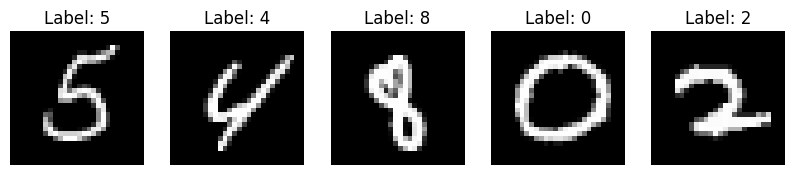

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for i in range(5):
    ax = axes[i]
    ax.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Label: {y_train.iloc[i]}")
plt.show()

In [29]:
# standaraize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [34]:
print("number of PC:", pca.n_components_)
print("explain var ratio:", sum(pca.explained_variance_ratio_))

number of PC: 330
explain var ratio: 0.9502986411242997


In [35]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [37]:
#  model
y_pred = model .predict(X_test_pca)

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9367857142857143
Confusion Matrix:
 [[1304    0    7    3    0    5   16    3    5    0]
 [   0 1563   15    5    5    1    2    1    7    1]
 [  11    3 1299   16   11    3   11    6   19    1]
 [   4    3   22 1330    1   14    2   18   22   17]
 [   2    2   13    0 1224    2    6    5    6   35]
 [   9    0    9   59    5 1146   13    5   21    6]
 [  10    0   13    0    7   14 1346    0    5    1]
 [   6    6   14    4   16    2    0 1406    5   44]
 [  12    8   22   37    8   29    7   11 1211   12]
 [   9    2   12   19   35    5    0   42   10 1286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.98      0.98      0.98      1600
           2       0.91      0.94      0.93      1380
           3       0.90      0.93      0.92      1433
           4       0.93      0.95      0.94      1295
           5       0.94      0.90      0.92      1273
           6      